In [2]:
import LCMGP
from DataGenerator import DataGenerator
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


## Steps:
In this experiment we test the effect of number of samples in the output data on classification accuracy and other scores
- Data used is from artifically generated data set 
- It has two latent features one upward slope and another can be gaussian and cyclic we only use gausssain here
- Since clustering can be spurious we try to control for that by running each experiment 25 times and then report their averages and variances 

This is from synthetic control data set, Even though it has upward slope as well as increasing trend we firsttry to learn only increasing trend

        

### testing Infra:

## Testing the effect of number of samples on classification accuracy

### 1. IN this data, C=3; P=2

In [ ]:
Ns = [20,50,80,150,300,600,1000]
#Ns = [20,50,80]
accuracies = {}
f1Scores = {}
f1ScoresV = {}
accuraciesV = {}
TRreconstruction ={}
TTreconstruction ={}
TRreconstructionV ={}
TTreconstructionV ={}
faultyModel = {}
C =3
S = 200
P =2
ind = 0.6
# We also fix phi
dtgen = DataGenerator()
for N in Ns:
    f1=[]
    accu=[]
    recTr = []
    recTt = []
    print "\n---\n N:",N
    for times in range(20):
        print times,
        #generate data
        phi = np.random.normal(loc=0,scale=1,size=(C,P))
        Y,L,uBar = dtgen.generateData(phi,S=S,C=C,N=N)
        # create train test split
        Y_train, Y_test, L_train, L_test = train_test_split(Y, L, test_size=0.4, random_state=0)
        # fit the model
        lcgm = LCMGP.LCMGP()
        lcgm.fit(Y=Y_train,L=L_train,N=N,induction=ind,iterations=150)
        # predict for test
        predictions,Expresults, ux = lcgm.predict(Y_test)
        # calcualte reconstruction error for training
        predictionst,Expresultst, utx = lcgm.predict(Y_train)
        recTr.append(reconstructionError(YBar=Y_train,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=utx))
        # calcualte reconstruction error for testing
        recTt.append(reconstructionError(YBar=Y_test,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=ux))
        #print "Result:",np.unique(predictions,return_counts=True),np.unique(L_test,return_counts=True)
        f1s = metrics.f1_score(y_pred=predictions,y_true=L_test)
        f1.append(f1s)
        if f1s < 0.30:
            faultyModel[ind] = lcgm
        accu.append(metrics.accuracy_score(y_pred=predictions,y_true=L_test))
        
    #print f1,"\n",accu,f1,recTr
    f1Scores[N] = np.mean(f1)
    accuracies[N] = np.mean(accu)
    f1ScoresV[N] = np.std(f1)
    accuraciesV[N] = np.std(accu)
    TRreconstruction[N] = np.mean(recTr)
    TTreconstruction[N] =np.mean(recTt)
    TRreconstructionV[N] = np.std(recTr)
    TTreconstructionV[N] =np.std(recTt)
#plt.plot(induction,results)


---
 N: 20
0 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
1 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
2 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
3 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
4 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
5 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
6 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
7 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
8 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
9 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates


 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:F-score is ill-defined and being set to 0.0 due to no predicted samples.


10 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
11 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
12 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
13 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
14 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
15 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
16 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
17 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
18 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates
19 200 3 2 20
Model initialized with  0.6 induction ratio
150 updates

---
 N: 50
0 200 3 2 50
Model initialized with  0.6 induction ratio
150 updates
1 200 3 2 50
Model initialized with  0.6 induction ratio
150 updates
2 200 3 2 50
Model initialized with  0.6 induction ratio
150 updates
3 200 3 2 50
Model initialized with  0.6 induction ratio
150 updates
4 200 3 2 50

In [6]:
%matplotlib inline
import numpy as np
def reconstructionError(YBar,uExpBar,phiHatExpBar):
    totalError = 0
    for s in range(YBar.shape[0]):
        totalError += np.sum(np.abs(YBar[s] - uExpBar[s]*phiHatExpBar.T))
    return totalError/YBar.shape[0]

## F1 Scores with respect to inducing point ratio

<Container object of 3 artists>

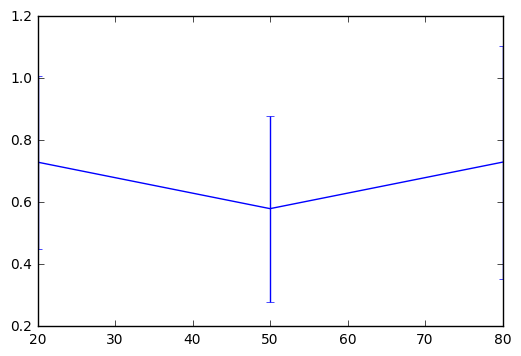

In [10]:
import pandas as pd
d=[]
for k,v in f1Scores.items():
    d.append((k,np.round(v,2),np.round(f1ScoresV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
#plt.xlim(0.15,0.85)

## Accuracies with respect to inducing point ratio

<Container object of 3 artists>

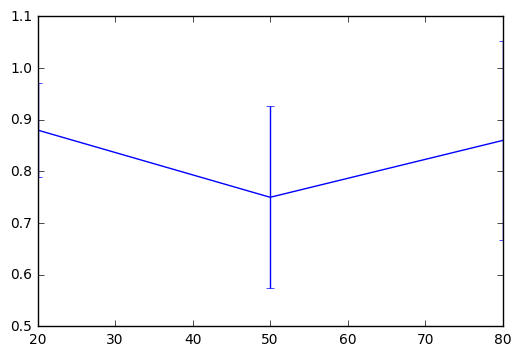

In [11]:
d=[]
for k,v in accuracies.items():
    d.append((k,np.round(v,2),np.round(accuraciesV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
#plt.xlim(0.15,0.85)

## Reconstruction errors, test and training

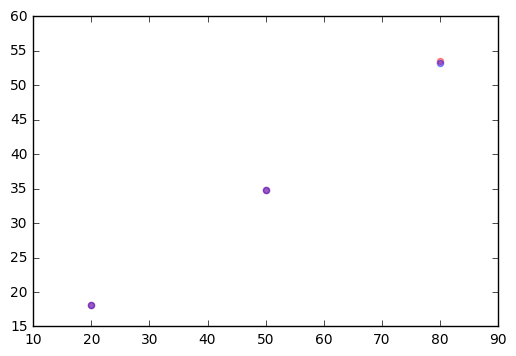

In [12]:
plt.scatter(TTreconstruction.keys(),TTreconstruction.values(),color='red',alpha=0.4)
plt.scatter(TRreconstruction.keys(),TRreconstruction.values(),color='blue',alpha=0.4)

Interesting thing is that even 50% of samples are enough to classify things properly.